In [1]:
from sklearn.datasets import load_breast_cancer
##X, y = load_breast_cancer(return_X_y=True)

#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(random_state=808).fit(X, y)

In [2]:
X, y = load_breast_cancer(return_X_y=True)

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
clf = LogisticRegression(random_state=808).fit(X, y)

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
##Regardons 2 échantillons en particulier et leur prédiction :

In [6]:
clf.predict([X[8, :]])

array([0])

In [7]:
#On obtient 0 : bénigne

In [8]:
#Un autre :

In [10]:
clf.predict([X[13, :]])
#On obtient 1 : maligne.

array([1])

In [11]:
#On peut aussi obtenir la probabilité de prédiction de chaque échantillon avec la fonction  predict_proba() 
#qui donne la paire de probabilité pour 0 et 1.

#Note dans le cas binaire : p(0) + p(1) = 1

In [12]:
clf.predict_proba([X[8, :]])

array([[0.69366964, 0.30633036]])

In [13]:
#Soit 69,7 % d'appartenir à la classe 0 et 30,3 % d'appartenir à la classe 1.

In [14]:
clf.predict_proba([X[13, :]])
##array([[0.1193025, 0.8806975]])

array([[0.12276132, 0.87723868]])

In [15]:
#Soit 12% d'appartenir à la classe 0 et 88 % d'appartenir à la classe 1.

In [16]:
##Le modèle semble moins fiable au niveau de sa classification pour l'échantillon 8 que pour l'échantillon 13.

In [17]:
##Un bon moyen d'analyser les performances d'un modèle de classification consiste à tracer l'histogramme 
##des probabilités des prédictions.

<AxesSubplot:ylabel='Count'>

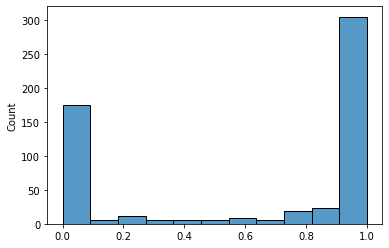

In [18]:
y_hat_proba = clf.predict_proba(X)[:,1]
import seaborn as sns
sns.histplot(y_hat_proba)

In [19]:
#Le modèle est assez fiable au niveau de ses prédictions, la plupart des prédictions ont une probabilité proche de 0
#ou de 1.

#Pour un mauvais modèle nous aurions par exemple des prédictions moins clairement espacées. Par exemple, ici, 
#la majorité des prédictions ont une probabilité entre 0,55 et 0,65. Le modèle est moins fiable.

In [20]:
##Évaluez la performance d'un modèle de classification

In [21]:
#Le plus simple pour mesurer la performance d'une classification est de regarder le nombre d'échantillons qui ont été correctement classés. C'est l'exactitude (accuracy, en anglais).

##exactitude = échantillons bien classés / échantillons au total

In [22]:
##Dans scikit-learn la fonction de calcul de l'accuracy est accuracy_score.

In [23]:
##Reprenons le modèle de régression logistique que nous venons d'entraîner, et obtenons ses prédictions :

In [24]:
y_pred = clf.predict(X)

In [25]:
##Son exactitude est alors :

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)


0.9472759226713533

In [27]:
#94,7 % ! C'est un bon score pour une simple régression logistique.

In [28]:
##Ce modèle est-il biaisé ou objectif ? A-t-il tendance à classer plutôt les 0 en 1 ou les 1 en 0 ?

In [29]:
##Pour voir cela on fait appel à la matrice de confusion, un tableau 2x2 avec en colonnes 
##le nombre de valeurs vraies et en rangées le nombre de valeurs prédites :

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)


array([[193,  19],
       [ 11, 346]])

In [32]:
#Comparons les résultats obtenus pour 2 autres seuils. Par exemple   t=0.3   et   t=0.7

  

##Pour obtenir les catégories prédites avec ces seuils, on part des probabilités prédites par le modèle 

In [33]:
y_hat_proba = clf.predict_proba(X)[:,1]

In [34]:
##On obtient les catégories relatives pour les 2 seuils :

In [35]:
y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba ]
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba ]

In [36]:
##On a alors les matrices de confusion suivantes :

   ## pour 0,3 :

In [37]:
confusion_matrix(y, y_pred_03)


array([[186,  26],
       [  6, 351]])

In [38]:
##pour 0,7 :

In [39]:
confusion_matrix(y, y_pred_07)
##array([[200,  12],
 #     [ 18, 339]])

array([[200,  12],
       [ 18, 339]])

In [40]:
##Les recalls et précisions sont récapitulés dans le tableau suivant :

In [41]:
from sklearn.metrics import precision_score, recall_score
precision_score(y, y_pred)
recall_score(y, y_pred)

0.969187675070028

In [42]:
#Pour tracer la courbe ROC :

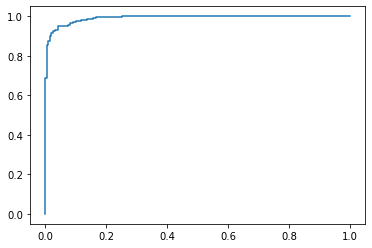

In [43]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_hat_proba)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)

In [44]:
##EN RÉSUMÉ

In [45]:
##On peut adapter la régression linéaire pour de la classification en appliquant la fonction logistique qui
##transforme la prédiction en une probabilité d'appartenance à une des classes.


In [46]:
##Pour évaluer la performance d'une classification on regarde la matrice de confusion, et des métriques comme
##la précision, l'accuracy, le recall. 

In [47]:
#La courbe ROC permet de s'affranchir du seuil de classification pour mesurer la performance d'un modèle de
#classification. 